# TASK-2

## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Dropping Unnecessary columns
df.drop(columns="Cabin", axis=1, inplace=True)

### Filling the missing values of the 'Age' column by Mean Value of the column 

In [8]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

### Filling the missing values of the 'Embarked' column by Mode Value of the column

In [9]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Checking the survival count of people

In [12]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Visualization of the survival count of people

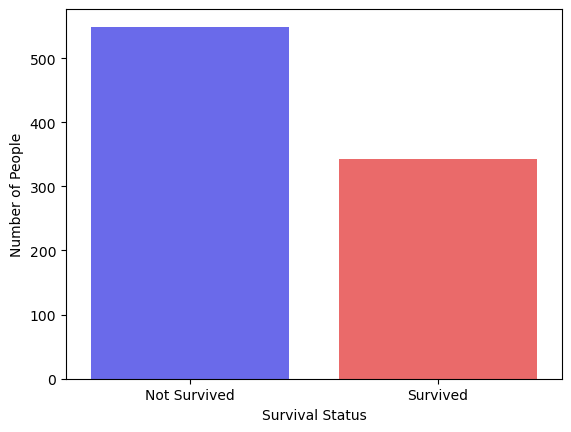

In [15]:
# Countplot
sns.countplot(x="Survived", data=df, palette='seismic',)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

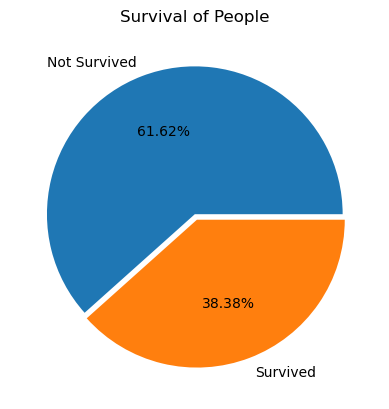

In [16]:
# Pie Chart
plt.pie(df["Survived"].value_counts(), explode=[0,0.04], autopct="%1.2f%%", labels=["Not Survived", "Survived"])
plt.title("Survival of People")
plt.show()

### Visualization of people survived of different gender

In [17]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

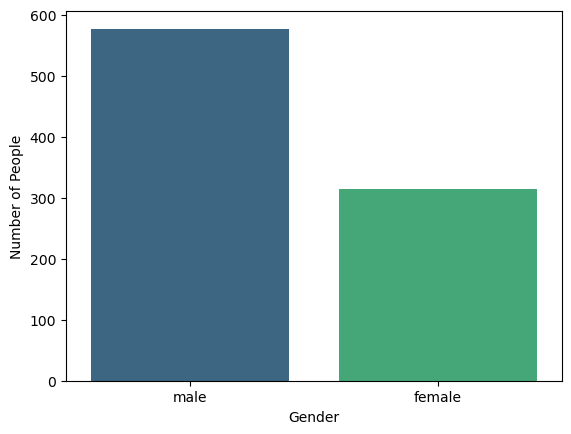

In [18]:
sns.countplot(x="Sex", data=df, palette="viridis",)
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()

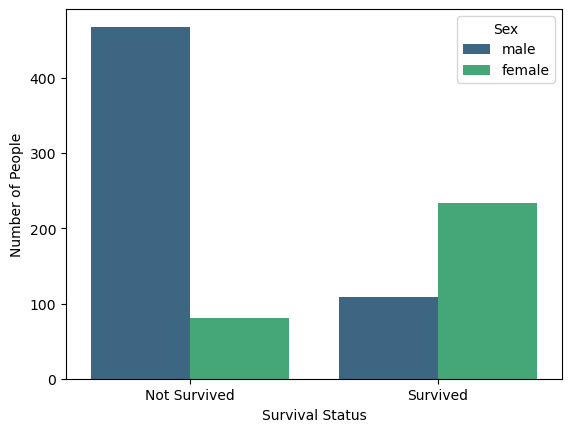

In [19]:
sns.countplot(x="Survived", hue="Sex", data=df, palette="viridis",)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

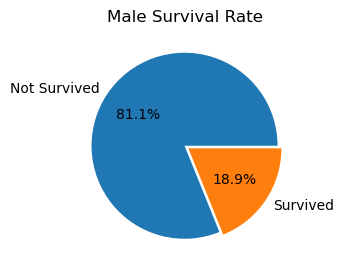

In [20]:
df[df["Sex"] == "male"].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6), explode=[0,0.05], autopct='%1.1f%%', labels=["Not Survived", "Survived"])
plt.ylabel("")
plt.title("Male Survival Rate")
plt.show()

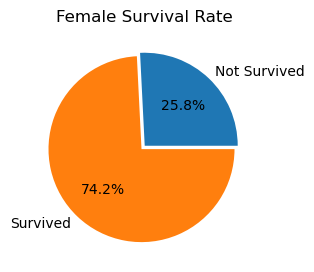

In [21]:
df[df["Sex"] == "female"].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6), explode=[0,0.05], autopct='%1.1f%%', labels=["Not Survived", "Survived"])
plt.ylabel("")
plt.title("Female Survival Rate")
plt.show()

### Observation - Survival rate of Female was much higher in comparison to Male

### Visualization of population with different passenger class 

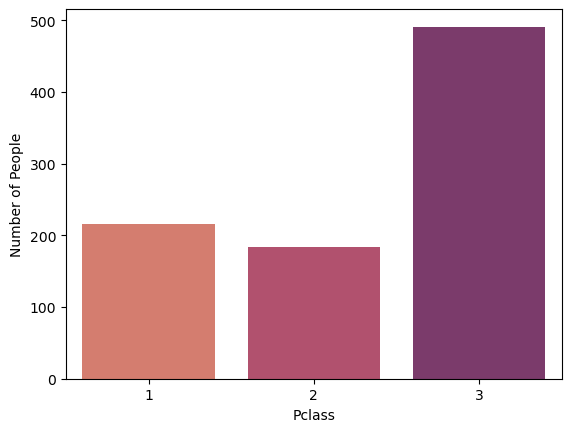

In [23]:
sns.countplot(x="Pclass", data=df, palette='flare',)
plt.xlabel("Pclass")
plt.ylabel("Number of People")
plt.show()

### Visualization of people survived with different passenger class

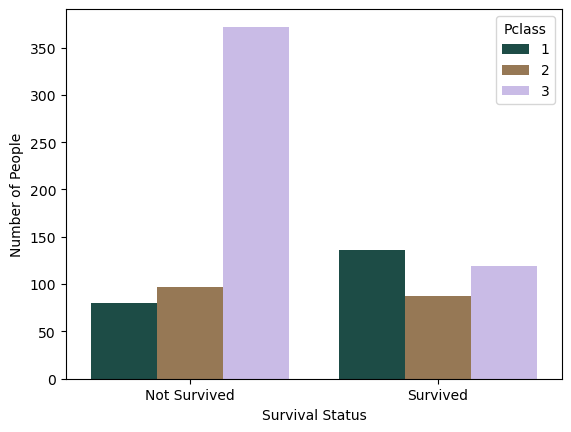

In [26]:
sns.countplot(x="Survived", hue="Pclass", data=df, palette='cubehelix',)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

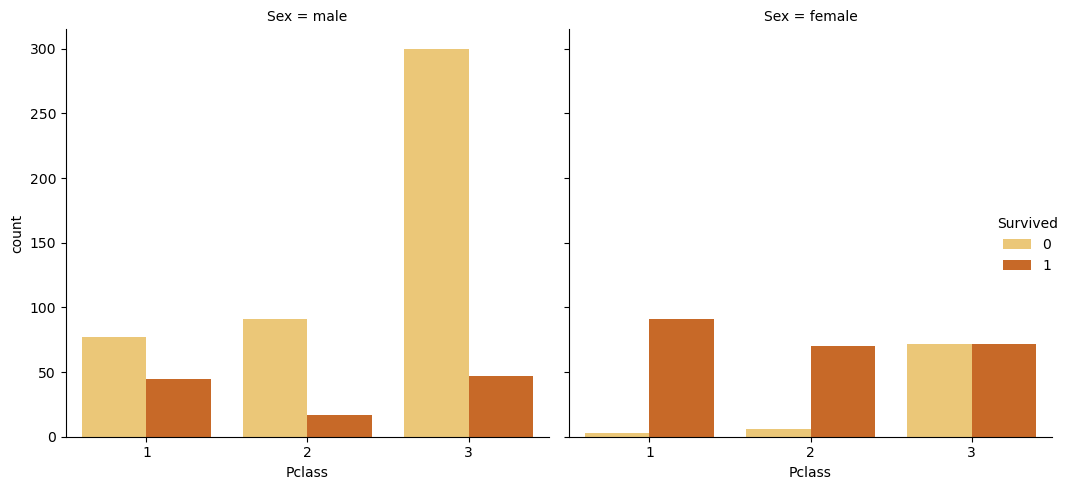

In [29]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=df, palette='YlOrBr')
plt.tight_layout()

### Visualization of people survived from different Embarkment

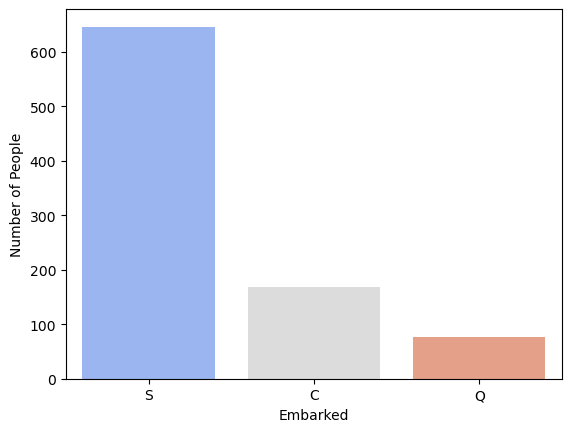

In [30]:
sns.countplot(x="Embarked", data=df, palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of People")
plt.show()

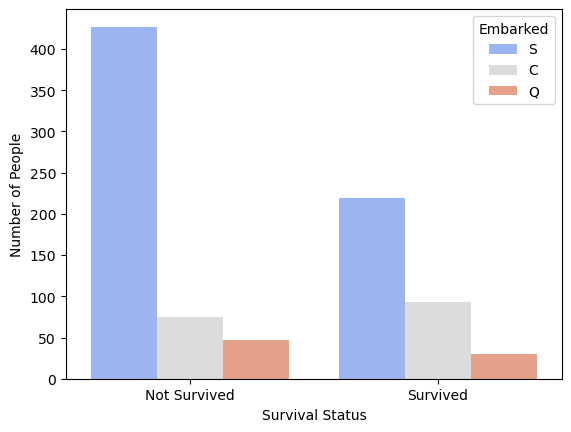

In [31]:
sns.countplot(x="Survived", hue="Embarked", data=df, palette='coolwarm',)
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.show()

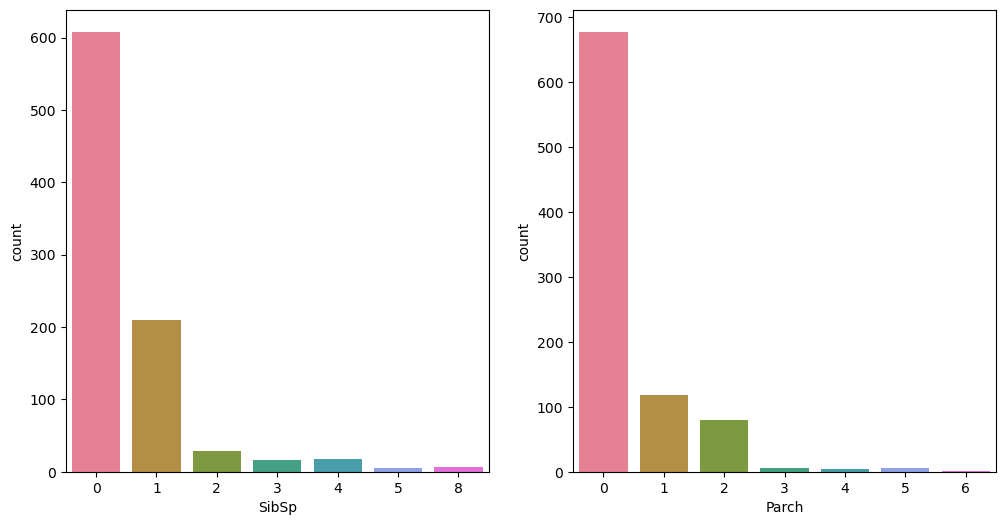

In [32]:
fig,axes=plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x="SibSp", data=df, ax=axes[0], palette='husl')
sns.countplot(x="Parch", data=df, ax=axes[1], palette='husl')
plt.show()

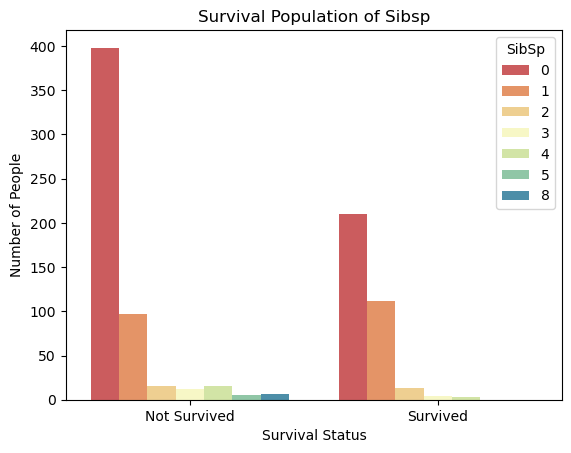

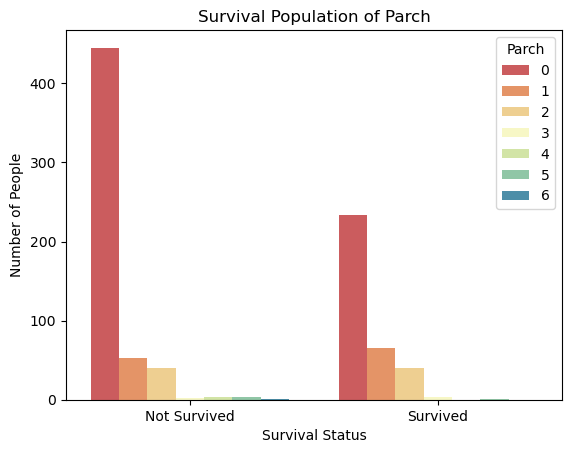

In [38]:
sns.countplot(x="Survived", hue="SibSp", data=df, palette='Spectral')
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.title("Survival Population of Sibsp")
plt.show()


sns.countplot(x="Survived", hue="Parch", data=df, palette='Spectral')
plt.xticks(ticks=[0,1],labels=["Not Survived", "Survived"])
plt.title("Survival Population of Parch")
plt.xlabel("Survival Status")
plt.ylabel("Number of People")
plt.show()

### Distribution of Fare and Age

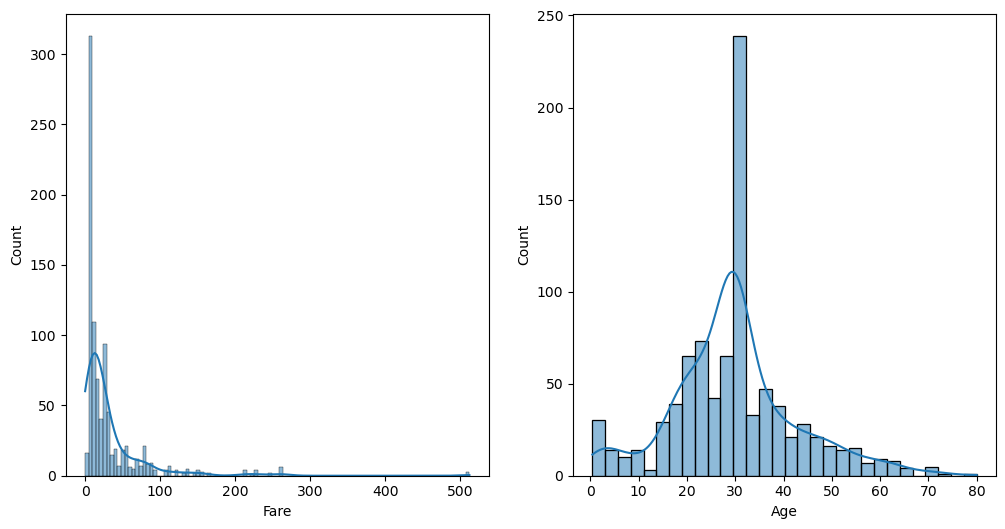

In [39]:
fig,axes=plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df["Fare"], kde=True, ax=axes[0])
sns.histplot(df["Age"].dropna(), kde=True, ax=axes[1])
plt.show()

### Visualizing survival rate in different age category

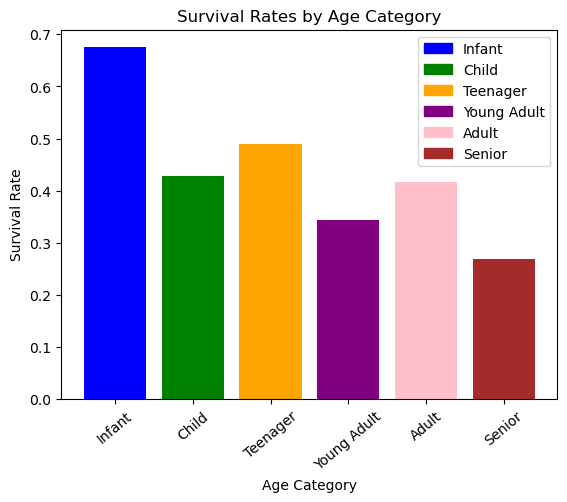

In [40]:
# Define Cut points and Label names
cut_points=[ 0, 5, 12, 18, 35, 60, 100]
label_names=["Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

# Creating "Age_Categories" column
df['Age_Categories']=pd.cut(df["Age"], bins=cut_points, labels=label_names, right=False)

# Creating a Pivot table for Survival Rates based on Age Categories
age_cat_pivot=df.pivot_table(index="Age_Categories", values="Survived")

# Defining colors for each bar
colors=["blue", "green", "orange", "purple", "pink", "brown"]

# Plotting the Bar Chart with different colors for each bar
fig, ax=plt.subplots()
bars=ax.bar(age_cat_pivot.index, age_cat_pivot["Survived"], color=colors)

# Adding legend with the specified colors
handles=[plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title("Survival Rates by Age Category")
ax.set_xlabel("Age Category")
ax.set_ylabel("Survival Rate")
plt.xticks(rotation=40)
plt.show()

### Observation - Young Adult had the least survival rate

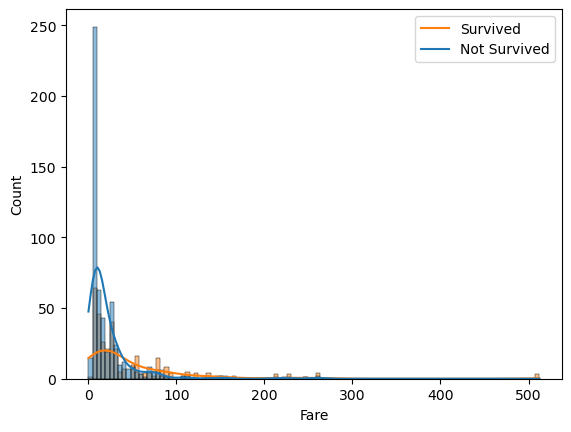

In [41]:
sns.histplot(x="Fare", hue="Survived", data=df, kde=True)
plt.legend(labels=["Survived", "Not Survived"])
plt.show()

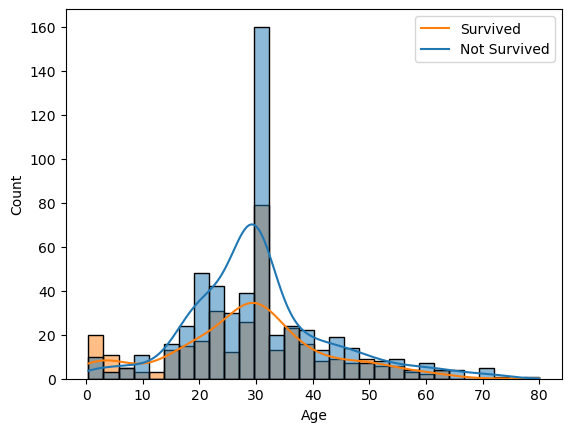

In [42]:
sns.histplot(x="Age", hue="Survived", data=df, kde=True)
plt.legend(labels=["Survived", "Not Survived"])
plt.show()

## Checking for Correlation

In [43]:
df.replace({"Sex":{"male":1, "female":0}, "Embarked":{"S":0, "C":1, "Q":2}}, inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


In [45]:
df_num=df[["Fare", "Parch", "SibSp", "Age", "Sex", "Pclass", "Embarked", "Survived"]]

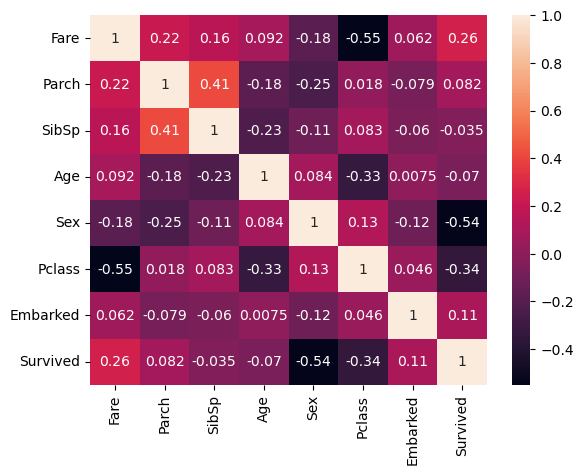

In [46]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

### Observation - Fare, Sex, Pclass, Embarked has correlation with survived column